In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  1 18:43:52 2020

@author: joaop
"""

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time
import numba
from numba import njit
import warnings
from epidemic_model_classes import *
from scipy.integrate import solve_ivp

# Deactivate numba deprecation warnings
warnings.simplefilter('ignore', category=numba.NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=numba.NumbaPendingDeprecationWarning)

In [4]:
t = np.linspace(1, 200, 200) # Days
n = 1000 # Repetitions

functions = [SIRD, SEIRD, SEIHRD, SEIARD] # Models

t_rk = np.zeros(len(functions)) # Time array for rk4
t_sivp_rk = np.zeros(len(functions)) # Time array for solve_ivp(RK45)
t_sivp_ls = np.zeros(len(functions)) # Time array for solve_ivp(LSODA)

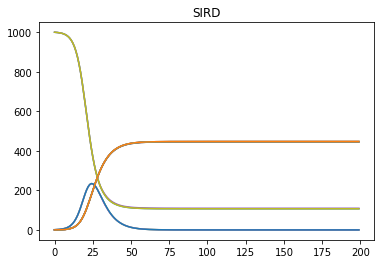


##################################################################

SIRD 

rk4 - solve_ivp(RK45) distance: 936.0098
rk4 - solve_ivp(LSODA) distance: 8.2085
solve_ivp(LSODA) - solve_ivp(RK45) distance: 935.3987

rk4: 0.0003 s
solve_ivp RK45: 0.0070 s
solve_ivp LSODA: 0.0075 s


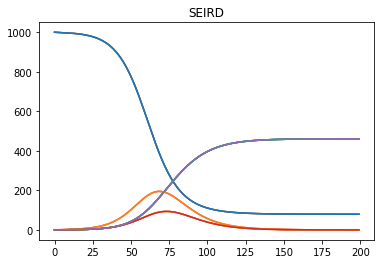


##################################################################

SEIRD 

rk4 - solve_ivp(RK45) distance: 13.4316
rk4 - solve_ivp(LSODA) distance: 26.4327
solve_ivp(LSODA) - solve_ivp(RK45) distance: 26.0336

rk4: 0.0003 s
solve_ivp RK45: 0.0066 s
solve_ivp LSODA: 0.0075 s


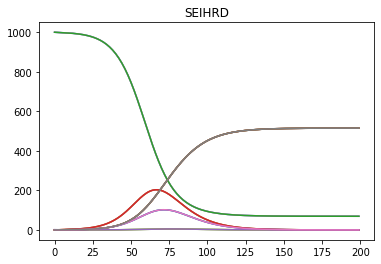


##################################################################

SEIHRD 

rk4 - solve_ivp(RK45) distance: 11.4011
rk4 - solve_ivp(LSODA) distance: 48.3669
solve_ivp(LSODA) - solve_ivp(RK45) distance: 46.3574

rk4: 0.0003 s
solve_ivp RK45: 0.0067 s
solve_ivp LSODA: 0.0087 s


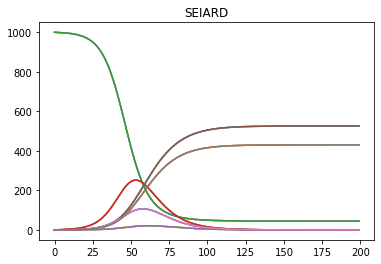


##################################################################

SEIARD 

rk4 - solve_ivp(RK45) distance: 18.5001
rk4 - solve_ivp(LSODA) distance: 17.4302
solve_ivp(LSODA) - solve_ivp(RK45) distance: 25.1771

rk4: 0.0003 s
solve_ivp RK45: 0.0075 s
solve_ivp LSODA: 0.0080 s


In [5]:
c = 0 # Counting functions

for func in functions:
    
    # Generate initial conditions
    y0 = np.zeros(func.ncomp)
    y0[0] = 1000
    y0[-2] = 1
    
    # Generate parameters
    p = np.ones(func.nparams)/10
    p[0] = 0.5
    for i in range(len(func.params)):
        if func.params[i] == r"$N$":
            p[i] = 1000
        if func.params[i] == r"\tau_{h}":
            p[i] = 10
        if func.params[i] == r"\tau_{t}":
            p[i] = 20
    
    # Calculate and plot solutions for diffrent methods
    rk = rk4(func.model, y0, t, p, h=1.)
    sivp_rk = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="RK45", args=[p])
    sivp_ls = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="LSODA", args=[p])
    
    plt.plot(rk)
    plt.plot(sivp_rk.y.T)
    plt.plot(sivp_ls.y.T)
    plt.title(func.name)
    plt.show()
    
    # Print distance between results of different methods
    print("\n##################################################################\n")
    print(func.name, "\n")
    print("rk4 - solve_ivp(RK45) distance: %.4f" % np.sum(np.abs(rk-sivp_rk.y.T)))
    print("rk4 - solve_ivp(LSODA) distance: %.4f" % np.sum(np.abs(rk-sivp_ls.y.T)))
    print("solve_ivp(LSODA) - solve_ivp(RK45) distance: %.4f\n" % np.sum(np.abs(sivp_ls.y.T-sivp_rk.y.T)))
    
    # Calculate execution time
    t_rk[c] = time.time()
    for i in range(n):
        rk = rk4(func.model, y0, t, p, h=1.)
    t_rk[c] = time.time()-t_rk[c]
    
    t_sivp_rk[c] = time.time()
    for i in range(n):
        sivp_rk = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="RK45", args=[p])
    t_sivp_rk[c] = time.time()-t_sivp_rk[c]
    
    t_sivp_ls[c] = time.time()
    for i in range(n):
        sivp_ls = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="LSODA", args=[p])
    t_sivp_ls[c] = time.time()-t_sivp_ls[c]
    
    # Print execution time results
    print("rk4: %.4f s" % (t_rk[c]/n))
    print("solve_ivp RK45: %.4f s" % (t_sivp_rk[c]/n))
    print("solve_ivp LSODA: %.4f s" % (t_sivp_ls[c]/n))
    
    c += 1

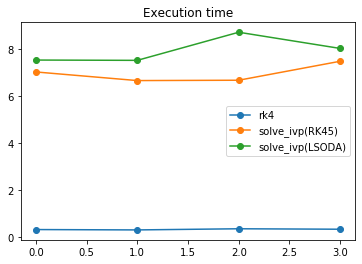

In [6]:
plt.plot(t_rk, linestyle="-", marker="o", label="rk4")
plt.plot(t_sivp_rk, linestyle="-", marker="o", label="solve_ivp(RK45)")
plt.plot(t_sivp_ls, linestyle="-", marker="o", label="solve_ivp(LSODA)")
plt.legend()
plt.title("Execution time")
plt.show()